# Предсказание цен машин с Юлы

In [3]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [4]:
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5] # Выводим первые 5 машин 

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [5]:
# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [6]:
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [7]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [8]:
# Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [11]:
model = Sequential()
model.add(Dense(3000, activation = 'linear', input_dim=3208))
model.add(Dense(100, activation = 'linear', input_dim=3000))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = Adam(lr=0.001), loss = 'mse')
# training
history = model.fit(x_train, y_train_scaled, epochs = 30, validation_split = 0.2, verbose=1, batch_size=100)



2021-08-04 11:25:17.788658: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 719811040 exceeds 10% of free system memory.


Epoch 1/30
561/561 [==============================] - 3s 5ms/step - loss: 0.3162 - val_loss: 0.4392
Epoch 2/30
561/561 [==============================] - 3s 5ms/step - loss: 0.2311 - val_loss: 0.2932
Epoch 3/30
561/561 [==============================] - 3s 5ms/step - loss: 0.1925 - val_loss: 0.2765
Epoch 4/30
561/561 [==============================] - 3s 5ms/step - loss: 0.1733 - val_loss: 0.2578
Epoch 5/30
561/561 [==============================] - 3s 5ms/step - loss: 0.1638 - val_loss: 0.2625
Epoch 6/30
561/561 [==============================] - 3s 5ms/step - loss: 0.1550 - val_loss: 0.2705
Epoch 7/30
561/561 [==============================] - 3s 5ms/step - loss: 0.1517 - val_loss: 0.2425
Epoch 8/30
561/561 [==============================] - 3s 5ms/step - loss: 0.1404 - val_loss: 0.2354
Epoch 9/30
561/561 [==============================] - 3s 5ms/step - loss: 0.1369 - val_loss: 0.2649
Epoch 10/30
561/561 [==============================] - 3s 5ms/step - loss: 0.1272 - val_loss: 0.2758

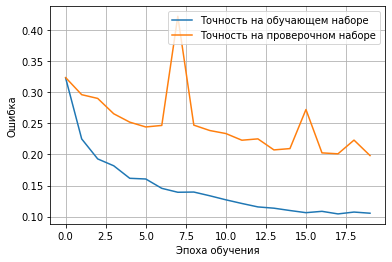

In [10]:
models_Historis = [history.history]

for history in models_Historis:
  plt.plot(history['loss'], 
          label='Точность на обучающем наборе')
  plt.plot(history['val_loss'], 
          label='Точность на проверочном наборе')
  plt.xlabel('Эпоха обучения' )
  plt.ylabel('Ошибка')
  plt.grid(True)
  plt.legend()
  plt.show()